# Numpy

In [902]:
import numpy as np
a=np.array([[0,1,2],[10,11,12]]);
b=np.array([[50,51,53],[57,98,37]]);
print(a)
print(b)

[[ 0  1  2]
 [10 11 12]]
[[50 51 53]
 [57 98 37]]


In [897]:
print(np.mean(a))
print(np.mean(b))
print(np.std(a))
print(np.std(b))
c=np.cov(a,b)
print(c)
print(c[0,1]/(np.std(a)*np.std(b)))#计算相关系数矩阵

[[ 0  1  2]
 [10 11 12]]
[[50 51 53]
 [57 98 37]]
6.0
57.666666666666664
5.066228051190222
19.058389811897076
[[  1.           1.           1.5        -10.        ]
 [  1.           1.           1.5        -10.        ]
 [  1.5          1.5          2.33333333 -23.5       ]
 [-10.         -10.         -23.5        967.        ]]
0.010356882739627565


In [899]:
#矩阵拼接
print(a.shape)
print(b.shape) 
np.vstack((a,b))#按列

(2, 3)
(2, 3)


array([[ 0,  1,  2],
       [10, 11, 12],
       [50, 51, 53],
       [57, 98, 37]])

In [900]:
np.hstack((a,b))#按行

array([[ 0,  1,  2, 50, 51, 53],
       [10, 11, 12, 57, 98, 37]])

In [901]:
np.dstack((a,b))#三维

array([[[ 0, 50],
        [ 1, 51],
        [ 2, 53]],

       [[10, 57],
        [11, 98],
        [12, 37]]])

# Pandas

In [903]:
import pandas as pd
import numpy as np

s=pd.Series([1,3,4,5,np.nan,7])#一维Series，有点像excel,默认float类型,index默认从0开始
s1=s.copy()
s1.index=list('abcdef')#自定义行索引
s.index.name="索引"#自定义索引列名

In [904]:
print(s)
print(s1)
print(s.index)#打印索引
print(s.values)#打印值
print(s[2:6])#切片,按照默认索引
print(s[::2])#自定义间隔
print(s1['a':'c'])#若为字母索引，按照实际索引来进行切片

索引
0    1.0
1    3.0
2    4.0
3    5.0
4    NaN
5    7.0
dtype: float64
a    1.0
b    3.0
c    4.0
d    5.0
e    NaN
f    7.0
dtype: float64
RangeIndex(start=0, stop=6, step=1, name='索引')
[ 1.  3.  4.  5. nan  7.]
索引
2    4.0
3    5.0
4    NaN
5    7.0
dtype: float64
索引
0    1.0
2    4.0
4    NaN
dtype: float64
a    1.0
b    3.0
c    4.0
dtype: float64


In [905]:
#DataFrame为二维类型
date=np.arange(1,7,1)
col=list('ABCD')
df=pd.DataFrame(np.random.randn(6,4),index=date,columns=col)
#自定义数据，行索引和列索引
df2=pd.DataFrame({'A':1,'B':2,'C':pd.Timestamp('20190902'),'D':pd.Series(1,index=list(range(4)),dtype=float),'E':np.array([3]*4,dtype=int),'F':pd.Categorical(['test','train','test','train'])})
#利用字典形式传入数据

In [ ]:
print(date)
print(df)
print(df2)

In [ ]:
#查看数据
#head:默认前5行，tail:默认后5行，可以指定行数
print(df2.head)
print(df2.tail)
print(df2.head(3))#指定前3行

#查看数据类型
print(df2.dtypes)

#查看属性
print(df2.index)#行标签
print(df2.columns)#列标签
print(df2.values)#值

In [908]:
#pandas读入文件数据
df=pd.read_excel(r"D:\豆瓣电影数据.xlsx",index_col=0)#指定第一列为0


In [ ]:
#进行数据操作

df.head()
df.iloc[:5]#行操作 

#添加一行
dit={'名字':'复仇','投票人数':123456,'类型':'科幻','产地':'美国','上映时间':'1995-09-10','时长':123,'年代':1998,'评分':np.nan,'首映地点':'美国'}
s=pd.Series(dit)
s.name=38738
df=df._append(s)

#删除一行
# df=df.drop([38738])


#列操作
df.columns

#取单列前五个数据
df['名字'][:5]

#多列
df[['名字','类型']][:5]

#增加列
df['序号']=np.arange(1,len(df)+1)

# df[:5]

# 删除列
df=df.drop('序号',axis=1)#序号所在列删除

df[:5]


In [ ]:
#利用行列标签选择数据
df.loc[1,]


#进行条件选择

df[df.产地=='美国'][:5]#前5个产地为美国的电影

df[(df.产地=='美国')&(df.评分>9)][:5]#前5个产地为美国的电影,并且评分大于9

df[((df.产地=='美国')|(df.产地=='中国大陆'))&(df.评分>9)][:5]#前5个产地为美国或中国的电影,并且评分大于9

# df[(df.产地=='中国大陆')&(df.评分>9)][:5]

In [ ]:
#缺失值判断

df[df['名字'].isnull()][:10]#前10个名字为空的数据

df[df['名字'].notnull()][:10]

#缺失值处理

#填充
df[df['评分'].isnull()]

df['评分'].fillna(np.mean(df['评分']),inplace=True)#利用均值填充,并且原地修改

df['名字'].fillna('未知电影',inplace=True)


#删除
df2=df.dropna()#删除含有缺失值的行
len(df2)

#异常值处理
df[df.投票人数<0]

df[df.投票人数%1!=0]

#保留有效值
df[df.投票人数>0]
df[df.投票人数%1==0]

In [ ]:
#数据保存

df.to_excel("data.xlsx")

In [ ]:
import numpy as np
import pandas as pd

#读入下载数据
df=pd.read_excel("data.xlsx",index_col=0)

df[:5]

In [ ]:
#数据格式转换

#查看格式
df['投票人数'].dtype

#转换格式
df['投票人数']=df['投票人数'].astype('int');

df['产地'].dtype
df['产地']=df['产地'].astype('str')

df['年代']=df['年代'].astype('int')


In [ ]:
df[df.年代=='2008\u200e']
# df[df.年代=='2008\u200e']['年代'].values

In [ ]:
df.loc[15205,'年代']=2008

In [ ]:
df.loc[15205]

In [ ]:
df['年代']=df['年代'].astype('int')

In [ ]:
df['年代'][:5]

In [ ]:
df['时长']=df['时长'].astype('int')

In [ ]:
df[df.时长=='8U']
df[df.时长=='12J']

In [ ]:
df.loc[31644,'时长']=120
df.loc[32949,'时长']=120
df.loc[31644]
df.loc[32949]

In [ ]:
df['时长']=df['时长'].astype('int')


In [ ]:
#自定义排序

#按照投票人数进行投票
df.sort_values(by='投票人数',ascending=False)#降序

#年代排序
df.sort_values(by='年代')[1:6]

#多个排序,先评分，再投票人数
df.sort_values(by=['评分','投票人数'],ascending=False)[:5]

In [ ]:
#基本统计分析

#描述性统计,获取各个统计量,通常可发现异常值
df=df[df.投票人数>=0]

df.describe()


In [ ]:
df=df[df.年代<=2025]#或者df.drop(df[df.年代>2025].index,inplace=True)
df=df[df.时长<1000]

#重新赋值index
df.index=range(len(df))

In [ ]:
#获取最值
df['投票人数'].max()#np.max(df['投票人数'])
df['投票人数'].min()#np.min(df['投票人数'])

#均值和中值
df['投票人数'].mean()#np.mean(df['投票人数'])
df['投票人数'].median()#np.median(df['投票人数'])

#方差和标准差
df['投票人数'].var()#np.var(df['投票人数'])
df['投票人数'].std()#np.std(df['投票人数'])

#求和
df['投票人数'].sum()#np.sum(df['投票人数'])

#相关系数和协方差
df[['投票人数','评分']].corr()
df[['投票人数','评分']].cov()

#计数
df['产地'].unique()
len(df['产地'].unique())

In [685]:
#数据替换
df['产地'].replace('USA','美国',inplace=True)#df.loc[df['产地']=='USA','产地']='美国'
df['产地'].replace(['西德','苏联'],['德国','俄罗斯'],inplace=True)


25

In [690]:
#计算每一年电影数量
df['年代'].unique()
len(df['年代'].unique())

df['年代'].value_counts()

df['产地'].value_counts()[:5]

df.to_excel('data2.xlsx')

In [720]:
#数据透视表,要求设置数值列,默认统计为均值
pd.set_option('display.max_rows',100);
pd.pivot_table(df,index=['年代'],values=['投票人数','时长','评分'],aggfunc='sum')
#按--分组,数值列为--,统计量为--
# df2.to_excel('pivot_table.xlsx')

#按照年代和产地进行聚集分析
pd.pivot_table(df,index=['年代','产地'],values=['投票人数','时长','评分'])

#按照产地进行聚集分析,计算投票人数和评分的均值与总和
pd.pivot_table(df,index=['产地'],values=['投票人数','评分'],aggfunc=['sum','mean'])

sum                        mean          
           投票人数            评分          投票人数        评分
产地                                                   
中国台湾    5237466   4367.200000   8474.864078  7.066667
中国大陆   41435313  23058.000000  10898.293793  6.064703
中国香港   23285389  18457.700000   8167.446159  6.474114
丹麦       394784   1434.700000   1993.858586  7.245960
俄罗斯      486127   3603.500000   1019.134172  7.554507
其他      3054077  13888.700000   1591.494007  7.237467
加拿大     1384765   4868.400000   1915.304288  6.733610
印度      1146271   2453.400000   3210.843137  6.872269
墨西哥      139613    843.400000   1173.218487  7.087395
巴西       357136    733.500000   3536.000000  7.262376
德国      2680983   7428.400000   2597.851744  7.198062
意大利     2502215   5377.300000   3340.740988  7.179306
日本     18000558  36331.500000   3564.466931  7.194356
比利时      170987   1003.300000   1230.122302  7.217986
法国     10213966  20384.700000   3627.118608  7.238885
波兰       159577   1347.000000    881.640884  7.441989
泰国      1564881   1796.100000   5322.724490  6.109184
澳大利亚    1415713   2093.400000   4719.043333  6.978000
瑞典       290123   1431.100000   1503.227979  7.415026
美国    101929351  83208.235704   8509.713725  6.946755
英国     13249603  20797.600000   4795.368440  7.527181
荷兰       144836   1114.500000    934.425806  7.190323
西班牙     1486733   3139.900000   3326.024609  7.024385
阿根廷      258271    843.700000   2226.474138  7.273276
韩国      8761080   8596.400000   6484.885270  6.362990

In [724]:
#若不考虑非数值列，用fill_value设置,指定如何填充缺失值
pd.pivot_table(df,index=['产地'],values=['投票人数','时长','评分'],aggfunc=['sum','mean'],fill_value=0)

sum                                 mean                      
           投票人数       时长            评分          投票人数          时长        评分
产地                                                                        
中国台湾    5237466    53925   4367.200000   8474.864078   87.257282  7.066667
中国大陆   41435313   309608  23058.000000  10898.293793   81.432930  6.064703
中国香港   23285389   252431  18457.700000   8167.446159   88.541214  6.474114
丹麦       394784    17444   1434.700000   1993.858586   88.101010  7.245960
俄罗斯      486127    45853   3603.500000   1019.134172   96.127883  7.554507
其他      3054077   167164  13888.700000   1591.494007   87.109953  7.237467
加拿大     1384765    57919   4868.400000   1915.304288   80.109267  6.733610
印度      1146271    43203   2453.400000   3210.843137  121.016807  6.872269
墨西哥      139613    10929    843.400000   1173.218487   91.840336  7.087395
巴西       357136     8869    733.500000   3536.000000   87.811881  7.262376
德国      2680983    95008   7428.400000   2597.851744   92.062016  7.198062
意大利     2502215    77902   5377.300000   3340.740988  104.008011  7.179306
日本     18000558   427773  36331.500000   3564.466931   84.707525  7.194356
比利时      170987    11447   1003.300000   1230.122302   82.352518  7.217986
法国     10213966   253169  20384.700000   3627.118608   89.903764  7.238885
波兰       159577    14613   1347.000000    881.640884   80.734807  7.441989
泰国      1564881    26002   1796.100000   5322.724490   88.442177  6.109184
澳大利亚    1415713    25549   2093.400000   4719.043333   85.163333  6.978000
瑞典       290123    18018   1431.100000   1503.227979   93.357513  7.415026
美国    101929351  1070256  83208.235704   8509.713725   89.351812  6.946755
英国     13249603   244125  20797.600000   4795.368440   88.355049  7.527181
荷兰       144836    11685   1114.500000    934.425806   75.387097  7.190323
西班牙     1486733    40455   3139.900000   3326.024609   90.503356  7.024385
阿根廷      258271    10638    843.700000   2226.474138   91.706897  7.273276
韩国      8761080   134734   8596.400000   6484.885270   99.729090  6.362990

In [732]:
#对不同值使用不同函数,需要在aggfunc用到字典操作
pd.pivot_table(df,index=['年代'],values=['投票人数','评分'],aggfunc={'投票人数':'sum','评分':'mean'},fill_value=0)

,投票人数,评分
年代,,
1888,776,7.950000
1890,51,4.800000
1892,176,7.500000
1894,338,6.633333
1895,7679,7.575000
...,...,...
2012,14462943,6.457717
2013,15215050,6.392604
2014,14573872,6.259777


In [735]:
#透视表的过滤
df3=pd.pivot_table(df,index=['年代'],values=['投票人数','评分'],aggfunc={'投票人数':'sum','评分':'mean'},fill_value=0)

#查找1994年数据
df3[df3.index==1994]

#按照评分倒序排列
df3.sort_values('评分',ascending=False) 

,投票人数,评分
年代,,
1924,10410,8.053571
1888,776,7.950000
1928,16193,7.945000
1912,761,7.920000
1923,7668,7.883333
...,...,...
2013,15215050,6.392604
2014,14573872,6.259777
2015,12483522,6.141960


In [801]:
#导入data2
df=pd.read_excel('data2.xlsx',index_col=0)

In [802]:
#层次化索引,一个轴对应多个索引
s=pd.Series(np.arange(1,10),index=[['a','a','a','b','b','c','c','d','d'],[1,2,3,1,2,3,1,2,3]])
s.index
s['a']
s['a':'c']
s[:,1]#找出(a,1),(b,1),(c,1)对应的索引

a    1
b    4
c    7
dtype: int32

In [803]:
#用Unstack把Series变成DataFrame,也可用stack()复原
s.unstack()
s.unstack().stack()

a  1    1.0
   2    2.0
   3    3.0
b  1    4.0
   2    5.0
c  1    7.0
   3    6.0
d  2    8.0
   3    9.0
dtype: float64

In [804]:
#DataFrame的层次化索引
data=pd.DataFrame(np.arange(12).reshape(4,3),index=[['a','a','b','b'],[1,2,1,2]],columns=[['A','A','B'],['Z','X','C']])#四行三列形式
data

A       B
     Z   X   C
a 1  0   1   2
  2  3   4   5
b 1  6   7   8
  2  9  10  11

In [805]:
#进行层次化列的选取
data['A']

Z   X
a 1  0   1
  2  3   4
b 1  6   7
  2  9  10

In [806]:
data.index.names=['row1','row2']
data.columns.names=['col1','col2']
data

col1       A       B
col2       Z   X   C
row1 row2           
a    1     0   1   2
     2     3   4   5
b    1     6   7   8
     2     9  10  11

In [807]:
data.swaplevel('row1','row2')

col1       A       B
col2       Z   X   C
row2 row1           
1    a     0   1   2
2    a     3   4   5
1    b     6   7   8
2    b     9  10  11

In [808]:
#处理电影数据为多层索引,加快查询，更为方便

df.index


Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       38719, 38720, 38721, 38722, 38723, 38724, 38725, 38726, 38727, 38728],
      dtype='int64', length=38729)

In [809]:
#把产地和年代修改为索引，外层为产地，内层为年代

df=df.set_index(['产地','年代'])
df


名字    投票人数  \
产地   年代                                                                
美国   1994                                             肖申克的救赎  692795   
     1957                                               控方证人   42995   
意大利  1997                                              美丽人生   327855   
美国   1994                                               阿甘正传  580897   
中国大陆 1993                                               霸王别姬  478523   
...                                                      ...     ...   
美国   1935                                              1935年      57   
中国大陆 1986                                               血溅画屏      95   
     1986                                             魔窟中的幻想      51   
俄罗斯  1977  列宁格勒围困之星火战役 Блокада: Фильм 2: Ленинградский ме...      32   
美国   1998                                                 复仇  123456   

                       类型                 上映时间   时长        评分    首映地点  
产地   年代                                                                
美国   1994           剧情/犯罪  1994-09-10 00:00:00  142  9.600000  多伦多电影节  
     1957        剧情/悬疑/犯罪  1957-12-17 00:00:00  116  9.500000      美国  
意大利  1997        剧情/喜剧/爱情  1997-12-20 00:00:00  116  9.500000     意大利  
美国   1994           剧情/爱情  1994-06-23 00:00:00  142  9.400000   洛杉矶首映  
中国大陆 1993        剧情/爱情/同性  1993-01-01 00:00:00  171  9.400000      香港  
...                   ...                  ...  ...       ...     ...  
美国   1935           喜剧/歌舞  1935-03-15 00:00:00   98  7.600000      美国  
中国大陆 1986  剧情/悬疑/犯罪/武侠/古装  1905-06-08 00:00:00   91  7.100000      美国  
     1986        惊悚/恐怖/儿童  1905-06-08 00:00:00   78  8.000000      美国  
俄罗斯  1977           剧情/战争  1905-05-30 00:00:00   97  6.600000      美国  
美国   1998              科幻           1995-09-10  123  6.935704      美国  

[38729 rows x 7 columns]

In [810]:
#利用索引查询数据
df.index[0]

('美国', 1994)

In [811]:
#获取所有美国电影,由于产地已经被修改成了标签,直接用loc

df.loc['美国']


,名字,投票人数,类型,上映时间,时长,评分,首映地点
年代,,,,,,,
1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.600000,多伦多电影节
1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.500000,美国
1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.400000,洛杉矶首映
2012,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.400000,中国大陆
1993,辛德勒的名单,306904,剧情/历史/战争,1993-11-30 00:00:00,195,9.400000,华盛顿首映
...,...,...,...,...,...,...,...
1987,零下的激情,199,剧情/爱情/犯罪,1987-11-06 00:00:00,98,7.400000,美国
1986,离别秋波,240,剧情/爱情/音乐,1986-02-19 00:00:00,90,8.200000,美国
1986,极乐森林,45,纪录片,1986-09-14 00:00:00,90,8.100000,美国


In [812]:
#切换行内外标签位置
df=df.swaplevel('产地','年代')


In [813]:
#查询所有1994年上映电影
df.loc[1994]

,名字,投票人数,类型,上映时间,时长,评分,首映地点
产地,,,,,,,
美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
法国,这个杀手不太冷,662552,剧情/动作/犯罪,1994-09-14 00:00:00,133,9.4,法国
美国,34街的,768,剧情/家庭/奇幻,1994-12-23 00:00:00,114,7.9,美国
中国大陆,活着,202794,剧情/家庭,1994-05-18 00:00:00,132,9.0,法国
...,...,...,...,...,...,...,...
美国,鬼精灵2： 恐怖,60,喜剧/恐怖/奇幻,1994-04-08 00:00:00,85,5.8,美国
英国,黑色第16,44,剧情/惊悚,1996-02-01 00:00:00,106,6.8,美国
日本,蜡笔小新之布里布里王国的秘密宝藏 クレヨンしんちゃん ブリブリ王国の,2142,动画,1994-04-23 00:00:00,94,7.7,日本


In [815]:
#取消层次化索引
df=df.reset_index()

In [816]:
df[:5]

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港


In [817]:
#数据旋转

#行列转换
data=df[:5]
data

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港


In [818]:
#进行数据的行列转置
data.T

,0,1,2,3,4
年代,1994,1957,1997,1994,1993
产地,美国,美国,意大利,美国,中国大陆
名字,肖申克的救赎,控方证人,美丽人生,阿甘正传,霸王别姬
投票人数,692795,42995,327855,580897,478523
类型,剧情/犯罪,剧情/悬疑/犯罪,剧情/喜剧/爱情,剧情/爱情,剧情/爱情/同性
上映时间,1994-09-10 00:00:00,1957-12-17 00:00:00,1997-12-20 00:00:00,1994-06-23 00:00:00,1993-01-01 00:00:00
时长,142,116,116,142,171
评分,9.6,9.5,9.5,9.4,9.4
首映地点,多伦多电影节,美国,意大利,洛杉矶首映,香港


In [821]:
#dataframe转series类型
data.stack()

#还原
data.stack().unstack()

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港


In [826]:
#数据分组,相比透视表更为方便

#按照产地进行分组
gp=df.groupby(df['产地'])

In [824]:
type(gp)#类型为分组变量

pandas.core.groupby.generic.DataFrameGroupBy

In [834]:
#计算分组后统计量(只计算数值列)
gp.mean(numeric_only=True)

#计算每年的平均评分
df['评分'].groupby(df['年代']).mean()


年代
1888    7.950000
1890    4.800000
1892    7.500000
1894    6.633333
1895    7.575000
          ...   
2012    6.457717
2013    6.392604
2014    6.259777
2015    6.141960
2016    5.868217
Name: 评分, Length: 126, dtype: float64

In [839]:
df['年代']=df['年代'].astype('str')
df.groupby(df['产地']).mean(numeric_only=True)
df.groupby(df['产地']).median(numeric_only=True)

,投票人数,时长,评分
产地,,,
中国台湾,487.0,92.0,7.1
中国大陆,501.5,90.0,6.4
中国香港,637.0,92.0,6.5
丹麦,181.5,93.5,7.3
俄罗斯,132.0,93.0,7.7
其他,154.0,90.0,7.4
加拿大,251.0,89.0,6.9
印度,138.0,131.0,7.0
墨西哥,174.0,93.0,7.2


In [851]:
#传入多个分组变量,仅仅考虑数值列
df.groupby([df['产地'],df['年代']]).mean(numeric_only=True)

#获得每个地区每一年的评分均值,这里只考虑了'评分'这一个数值列
means=df['评分'].groupby([df['产地'],df['年代']]).mean(numeric_only=True)
means

产地    年代  
中国台湾  1963    6.400000
      1965    6.800000
      1966    7.900000
      1967    8.000000
      1968    7.400000
                ...   
韩国    2012    6.064151
      2013    6.098198
      2014    5.650833
      2015    5.423853
      2016    5.730000
Name: 评分, Length: 1584, dtype: float64

In [853]:
#Series转DataFrame无数据处会产生缺失值NaN
means.unstack().T



产地,中国台湾,中国大陆,中国香港,丹麦,俄罗斯,其他,加拿大,印度,墨西哥,巴西,德国,意大利,日本,比利时,法国,波兰,泰国,澳大利亚,瑞典,美国,英国,荷兰,西班牙,阿根廷,韩国
年代,,,,,,,,,,,,,,,,,,,,,,,,,
1888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.950000,NaN,NaN,NaN,NaN
1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.800000,NaN,NaN,NaN,NaN,NaN
1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,6.450000,NaN,NaN,NaN,NaN,NaN
1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.575000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,6.556098,5.727187,6.110526,7.418750,6.572727,6.591743,6.425000,6.502632,7.100000,7.32,6.828846,6.922222,6.966667,6.700000,6.839286,7.066667,5.962963,6.614286,5.9625,6.437622,7.293103,6.766667,6.595238,6.483333,6.064151
2013,7.076471,5.316667,6.105714,6.555556,6.875000,6.853571,6.018182,6.400000,6.983333,8.00,6.893333,6.753333,7.101684,6.657143,6.904494,6.966667,5.568000,6.760000,7.1000,6.339668,7.448322,6.563636,6.358333,6.616667,6.098198
2014,6.522222,4.963757,5.616667,7.120000,7.175000,6.596250,5.921739,6.374194,7.250000,6.86,6.923077,6.475000,7.026113,6.350000,6.989610,7.060000,5.653571,6.568750,6.9600,6.415922,7.275000,7.300000,6.868750,7.150000,5.650833


In [857]:
#离散化处理(分组,区间化)
#在实际的数据处理中，有的数据并不关心其具体取值，只关心其所属区间或等级
#pd.cut(x,bins,right=True,labels=None,retbins=False,precision_lowest=False)
#分组默认为左开右闭区间
#x为操作对象,bins为分组依据,labels为返回区间的新命名

df['评分等级']=pd.cut(df['评分'],[0,3,5,7,9,10],labels=['E','D','C','B','A'])
df

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.600000,多伦多电影节,A
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.500000,美国,A
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.500000,意大利,A
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.400000,洛杉矶首映,A
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.400000,香港,A
...,...,...,...,...,...,...,...,...,...,...
38724,1935,美国,1935年,57,喜剧/歌舞,1935-03-15 00:00:00,98,7.600000,美国,B
38725,1986,中国大陆,血溅画屏,95,剧情/悬疑/犯罪/武侠/古装,1905-06-08 00:00:00,91,7.100000,美国,B
38726,1986,中国大陆,魔窟中的幻想,51,惊悚/恐怖/儿童,1905-06-08 00:00:00,78,8.000000,美国,B
38727,1977,俄罗斯,列宁格勒围困之星火战役 Блокада: Фильм 2: Ленинградский ме...,32,剧情/战争,1905-05-30 00:00:00,97,6.600000,美国,C


In [862]:
bins=np.percentile(df['投票人数'],[0,20,40,60,80,100])#按照百分位数分组
df['热门程度']=pd.cut(df['投票人数'],bins,labels=['E','D','C','B','A'])
df[:5]

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A


In [863]:
#查找投票人数多，评分低的电影
df[(df.评分等级=='E')&(df.热门程度=='A')]

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
655,2011,中国大陆,B区,5187,剧情/惊悚/恐怖,2011-06-03 00:00:00,89,2.3,中国大陆,E,A
4376,2014,中国大陆,怖偶,4867,悬疑/惊悚,2014-05-07 00:00:00,88,2.8,中国大陆,E,A
5413,2011,中国大陆,床下有人,4309,悬疑/惊悚,2011-10-14 00:00:00,100,2.8,中国大陆,E,A
6802,2013,中国大陆,帝国秘符,4351,动作/冒险,2013-09-18 00:00:00,93,3.0,中国大陆,E,A
8232,2011,中国大陆,飞天,4764,剧情,2011-07-01 00:00:00,115,2.9,中国大陆,E,A
8406,2014,中国大陆,分手达人,3937,喜剧/爱情,2014-06-06 00:00:00,90,2.7,中国大陆,E,A
9601,2012,中国大陆,孤岛惊魂,2982,悬疑/惊悚/恐怖,2013-01-26 00:00:00,93,2.8,中国大陆,E,A
10512,2013,中国大陆,海天盛宴·韦口,3788,情色,2013-10-12 00:00:00,88,2.9,网络,E,A
16797,2013,中国大陆,孪生密码,6390,动作/悬疑,2013-11-08 00:00:00,96,2.9,中国大陆,E,A
21531,2010,日本,拳皇,6329,动作/科幻/冒险,2012-10-12 00:00:00,93,3.0,中国大陆,E,A


In [864]:
#查找冷门高分电影
df[(df.热门程度=='E')&(df.评分等级=='A')]

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
456,2015,美国,未知电影,45,音乐,2015-12-14 00:00:00,60,9.3,美国,A,E
587,2011,英国,BBC喜剧音,38,喜剧/音乐/歌舞,2011-08-13 00:00:00,95,9.3,美国,A,E
642,2003,美国,未知电影,38,纪录片/音乐,2003-02-03 00:00:00,55,9.2,美国,A,E
686,2014,英国,未知电影,63,音乐/舞台艺术,2014-05-18 00:00:00,49,9.5,美国,A,E
698,2008,英国,未知电影,52,纪录片,2008-07-25 00:00:00,40,9.8,美国,A,E
...,...,...,...,...,...,...,...,...,...,...,...
37578,1986,英国,歌唱神探,36,剧情/悬疑/歌舞,1986-11-16 00:00:00,415,9.1,美国,A,E
37704,1972,美国,未知电影,56,纪录片,1972-12-23 00:00:00,70,9.3,美国,A,E
38110,1975,美国,山那边,70,剧情,1975-11-14 00:00:00,103,9.1,美国,A,E
38443,2015,美国,奎,62,纪录片/短片,2015-08-19 00:00:00,9,9.1,纽约电影论坛,A,E


In [865]:
df.to_excel('data3.xlsx')

In [867]:
#合并数据集

#把数据集分成多个，在进行合并
df_usa=df[df.产地=='美国']
df_china=df[df.产地=='中国大陆']


In [872]:
#将中国和美国数据拼接一起,用_append,但只能拼接一个，推荐后文的pd.concat
df_china._append(df_usa)

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.400000,香港,A,A
21,1961,中国大陆,大闹天宫,74881,动画/奇幻,1905-05-14 00:00:00,114,9.200000,上集,A,A
29,2015,中国大陆,穹顶之下,51113,纪录片,2015-02-28 00:00:00,104,9.200000,中国大陆,A,A
38,1982,中国大陆,茶馆,10678,剧情/历史,1905-06-04 00:00:00,118,9.200000,美国,A,A
45,1988,中国大陆,山水情,10781,动画/短片,1905-06-10 00:00:00,19,9.200000,美国,A,A
...,...,...,...,...,...,...,...,...,...,...,...
38717,1987,美国,零下的激情,199,剧情/爱情/犯罪,1987-11-06 00:00:00,98,7.400000,美国,B,D
38719,1986,美国,离别秋波,240,剧情/爱情/音乐,1986-02-19 00:00:00,90,8.200000,美国,B,C
38722,1986,美国,极乐森林,45,纪录片,1986-09-14 00:00:00,90,8.100000,美国,B,E
38724,1935,美国,1935年,57,喜剧/歌舞,1935-03-15 00:00:00,98,7.600000,美国,B,E


In [885]:
#若数据间存在相同项,用merge,类比sql的join
df1=df[:6]
df1

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A
5,2012,美国,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆,A,A


In [886]:
df2=df[['名字','产地']][:6]
df2['票房']=[21344,5325,23187,53424,21341,546745]
df2=df2.sample(frac=1)
df2.index=range(len(df2))
df2

,名字,产地,票房
0,霸王别姬,中国大陆,21341
1,阿甘正传,美国,53424
2,控方证人,美国,5325
3,肖申克的救赎,美国,21344
4,泰坦尼克号,美国,546745
5,美丽人生,意大利,23187


In [887]:
#把df1与df2合并,按照名字进行内连接

pd.merge(df1,df2,how='inner',on='名字')


,年代,产地_x,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度,产地_y,票房
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A,美国,21344
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A,美国,5325
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A,意大利,23187
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A,美国,53424
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A,中国大陆,21341
5,2012,美国,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆,A,A,美国,546745


In [888]:
#利用concat进行批量合并

df1=df[:10]
df2=df[100:110]
df3=df[200:210]

In [889]:
df1

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A
5,2012,美国,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆,A,A
6,1993,美国,辛德勒的名单,306904,剧情/历史/战争,1993-11-30 00:00:00,195,9.4,华盛顿首映,A,A
7,1997,日本,新世纪福音战士剧场版：Air/真心为你 新世紀エヴァンゲリオン劇場版 Ai,24355,剧情/动作/科幻/动画/奇幻,1997-07-19 00:00:00,87,9.4,日本,A,A
8,2013,日本,银魂完结篇：直到永远的万事屋 劇場版 銀魂 完結篇 万事屋よ,21513,剧情/动画,2013-07-06 00:00:00,110,9.4,日本,A,A
9,1994,法国,这个杀手不太冷,662552,剧情/动作/犯罪,1994-09-14 00:00:00,133,9.4,法国,A,A


In [890]:
df2

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
100,1993,韩国,101,146,喜剧/爱情,1993-06-19 00:00:00,112,7.4,韩国,B,D
101,1995,英国,10,186,喜剧,1995-01-25 00:00:00,101,7.4,美国,B,D
102,2013,韩国,素媛,114819,剧情/家庭,2013-10-02 00:00:00,123,9.1,韩国,A,A
103,2003,美国,101忠狗续集：伦敦,924,喜剧/动画/家庭,2003-01-21 00:00:00,70,7.5,美国,B,B
104,2000,美国,10,9514,喜剧/家庭,2000-09-22 00:00:00,100,7.0,美国,C,A
105,2013,韩国,10,601,剧情,2014-04-24 00:00:00,93,7.2,美国,B,C
106,2006,美国,10件或,1770,剧情/喜剧/爱情,2006-12-01 00:00:00,82,7.7,美国,B,B
107,2014,美国,10年,1531,喜剧/同性,2015-06-02 00:00:00,90,6.9,美国,C,B
108,2012,日本,11·25自决之日 三岛由纪夫与年轻人们 11・25自決の,149,剧情,2012-06-02 00:00:00,119,5.6,日本,C,D
109,1997,美国,泰坦尼克号,535491,剧情/爱情/灾难,1998-04-03 00:00:00,194,9.1,中国大陆,A,A


In [891]:
df3

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
200,2014,日本,最完美的离婚 2014特别篇,18478,剧情/喜剧/爱情,2014-02-08 00:00:00,120,9.1,日本,A,A
201,2009,日本,2001夜物,84,剧情/动画,2009-10-02 00:00:00,80,6.6,美国,C,D
202,2009,中国香港,头七 頭,7039,恐怖,2009-05-21 00:00:00,60,6.2,美国,C,A
203,1896,法国,火车进站 L,7001,纪录片/短片,1896-01-06,60,8.8,法国,B,A
204,2009,美国,银行舞蹈,6944,短片,1905-07-01 00:00:00,60,7.8,美国,B,A
205,2003,荷兰,2003提雅,48,音乐,2003-10-07 00:00:00,200,8.9,美国,B,E
206,2012,美国,死亡飞车3：地狱烈,6937,动作,2012-12-12 00:00:00,60,5.8,美国,C,A
207,2012,日本,时光钟摆 振り,6876,剧情/动画/短片,2012-03-20 00:00:00,60,8.7,美国,B,A
208,2011,中国香港,你还可爱么 你還可愛,6805,短片,2011-04-22 00:00:00,60,8.3,美国,B,A
209,2002,中国香港,一碌蔗,6799,剧情/喜剧/爱情,2002-09-19 00:00:00,60,6.7,美国,C,A


In [895]:
df4=pd.concat([df1,df2,df3],axis=0)#按行拼接,可执行多个拼接
df4

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A
5,2012,美国,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆,A,A
6,1993,美国,辛德勒的名单,306904,剧情/历史/战争,1993-11-30 00:00:00,195,9.4,华盛顿首映,A,A
7,1997,日本,新世纪福音战士剧场版：Air/真心为你 新世紀エヴァンゲリオン劇場版 Ai,24355,剧情/动作/科幻/动画/奇幻,1997-07-19 00:00:00,87,9.4,日本,A,A
8,2013,日本,银魂完结篇：直到永远的万事屋 劇場版 銀魂 完結篇 万事屋よ,21513,剧情/动画,2013-07-06 00:00:00,110,9.4,日本,A,A
9,1994,法国,这个杀手不太冷,662552,剧情/动作/犯罪,1994-09-14 00:00:00,133,9.4,法国,A,A


# Matplotlib

In [910]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Text(0.5, 0, '$x$')

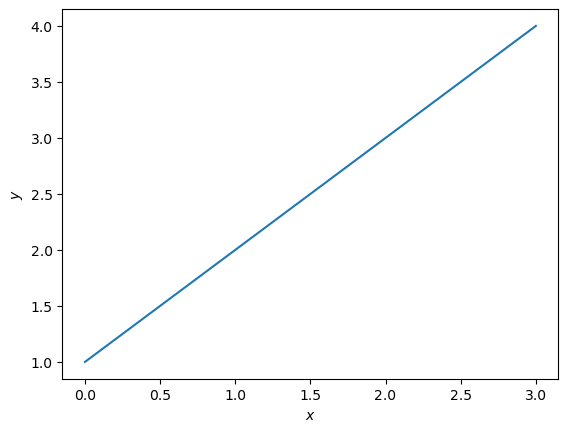

In [912]:
#绘制线图:plt.plot(x,y),默认x为0~n-1
plt.plot([1,2,3,4])

#添加说明
plt.ylabel('$y$')
plt.xlabel('$x$')

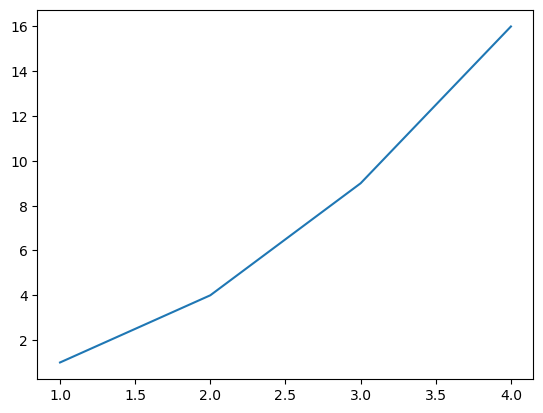

In [913]:
plt.plot([1,2,3,4],[1,4,9,16])

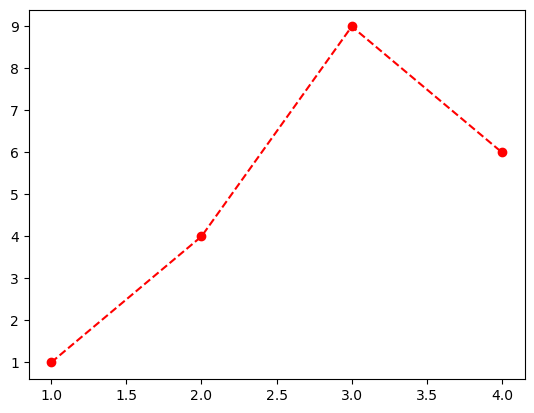

In [922]:
plt.plot([1,2,3,4],[1,4,9,6],'r--o')#红色虚线红点

(0.0, 6.0, 0.0, 20.0)

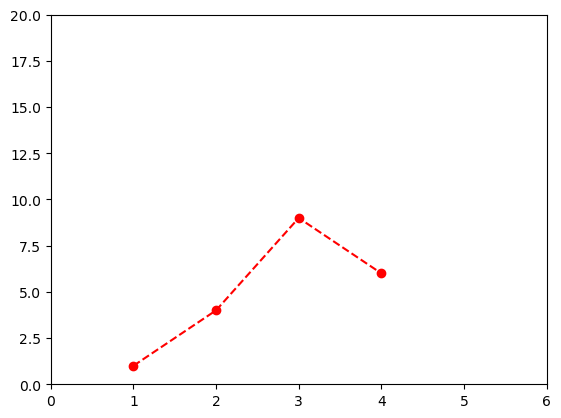

In [923]:
#坐标轴显示范围修改
plt.plot([1,2,3,4],[1,4,9,6],'r--o')
plt.axis([0,6,0,20])#表示x从0~6,y从0~20

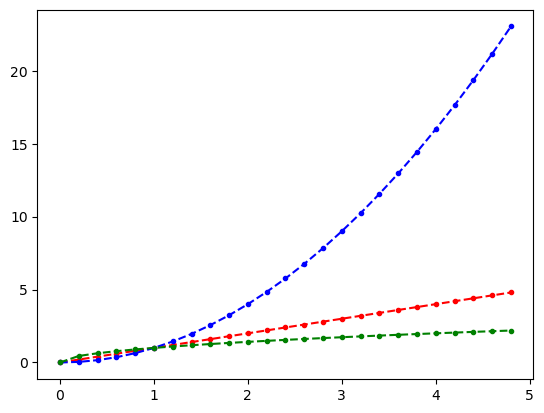

In [940]:
#尝试传入numpy数组,并画多条线
t=np.arange(0,5,0.2)
plt.plot(t,t,'r--.',t,t**2,'b--.',t,np.sqrt(t),'g--.')

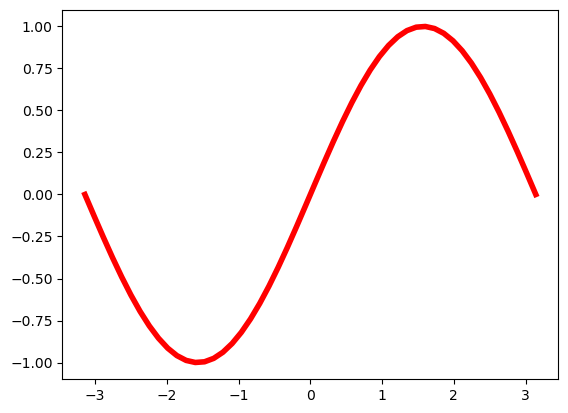

In [945]:
#线条属性设置
x=np.linspace(-np.pi,np.pi)
y=np.sin(x)
plt.plot(x,y,linewidth=4.0,color='r')

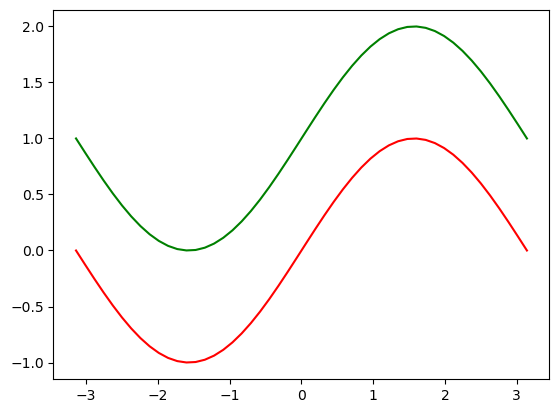

In [947]:
plt.plot(x,y,'r-',x,y+1,'g-')

[None, None]

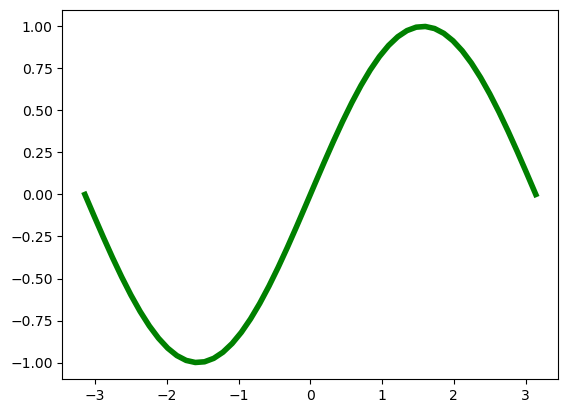

In [949]:
#利用plt.setp()修改线条性质
line=plt.plot(x,y)
plt.setp(line,color='g',linewidth=4)


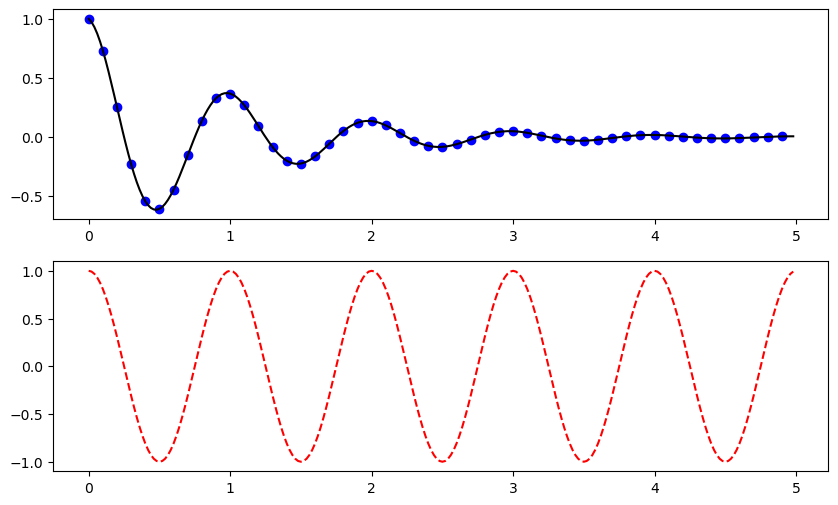

In [971]:
#子图设置

def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)

t1=np.arange(0,5,0.1)
t2=np.arange(0,5,0.02)

#设置图形尺寸
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)#两行,一列,第一张
plt.plot(t1,f(t1),'bo',t2,f(t2),'k')
plt.subplot(2,1,2)
plt.plot(t2,np.cos(2*np.pi*t2),'r--')

In [2]:
#利用电影数据绘图

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#中文设置
plt.rcParams['font.sans-serif']=['SimHei']  #设置中文字体为黑体（SimHei）
plt.rcParams['axes.unicode_minus']=False    #解决负号 '-' 显示为方块的问题

#数据读取
df=pd.read_excel('data3.xlsx',index_col=0)

In [975]:
df[:5]

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A


[Text(0, 3, '11978'),
 Text(0, 3, '5050'),
 Text(0, 3, '3802'),
 Text(0, 3, '2851'),
 Text(0, 3, '2816'),
 Text(0, 3, '2763'),
 Text(0, 3, '1919'),
 Text(0, 3, '1351'),
 Text(0, 3, '1032'),
 Text(0, 3, '749'),
 Text(0, 3, '723'),
 Text(0, 3, '618'),
 Text(0, 3, '477'),
 Text(0, 3, '447'),
 Text(0, 3, '357'),
 Text(0, 3, '300'),
 Text(0, 3, '294'),
 Text(0, 3, '198'),
 Text(0, 3, '193'),
 Text(0, 3, '181'),
 Text(0, 3, '155'),
 Text(0, 3, '139'),
 Text(0, 3, '119'),
 Text(0, 3, '116'),
 Text(0, 3, '101')]

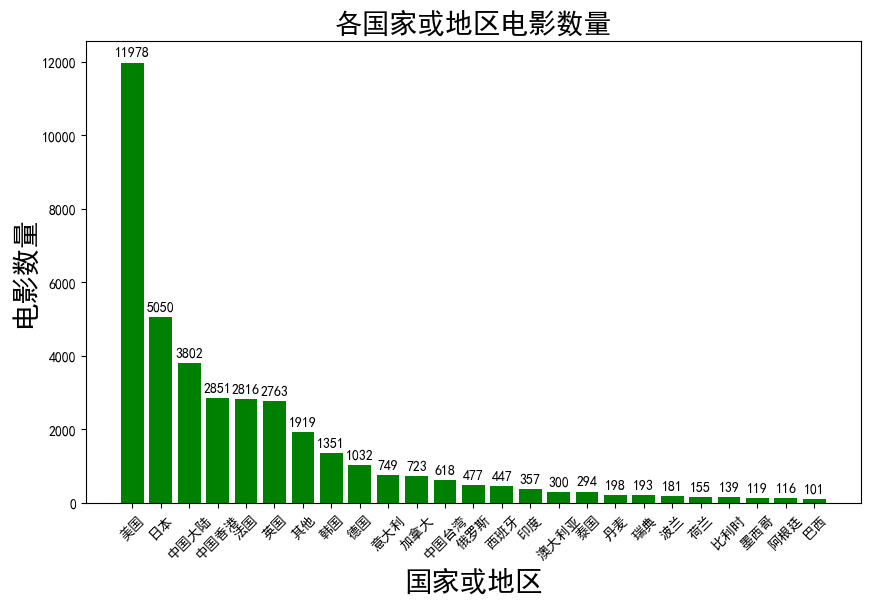

In [3]:
#绘制每个国家的电影数量的柱状图

data=df['产地'].value_counts()
x=data.index
y=data.values
plt.figure(figsize=(10,6))#10*6大小
#柱状图
bars=plt.bar(x,y,color='g')
plt.title('各国家或地区电影数量',fontsize=20)
#标签大小
plt.xlabel('国家或地区',fontsize=20)
plt.ylabel('电影数量',fontsize=20)
#标签位置
plt.xticks(rotation=45)

#在位置添加文本
# for a,b in zip(x,y):
#     plt.text(a,b+10,b,ha='center',va='bottom',fontsize=10)#(a,b+10)位置,内容为b,中央

#用bar_label更方便
plt.bar_label(bars,labels=y,padding=3,fontsize=10)#pading表示离柱子的距离,labels为指定数值

#添加网格线
#plt.grid()

Text(1980, 1000, '电影数量开始快速增长')

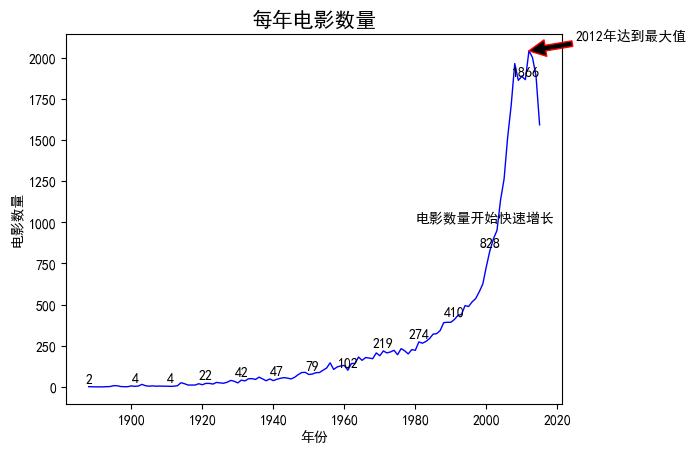

In [4]:
#绘制每年上映电影数量曲线图

data=df['年代'].value_counts()
data=data.sort_index()[:-1]#按标签排序，并选择有效列
x=data.index
y=data.values

plt.plot(x,y,color='b',linewidth=1)
plt.title('每年电影数量',fontsize=15)
plt.xlabel('年份',fontsize=10)
plt.ylabel('电影数量',fontsize=10)

#添加曲线标记
for a,b in zip(x[::10],y[::10]):
    plt.text(a,b+10,b,ha='center',va='bottom',fontsize=10)

#添加箭头,注释
plt.annotate('2012年达到最大值',xy=(2012,data[2012]),xytext=(2025,2100),arrowprops=dict(facecolor='black',edgecolor='red'))

plt.text(1980,1000,'电影数量开始快速增长')



In [5]:
#根据电影长度绘制饼图
data=pd.cut(df['时长'],[0,60,90,110,1000]).value_counts()
data

时长
(90, 110]      13231
(0, 60]        10318
(60, 90]        7726
(110, 1000]     7454
Name: count, dtype: int64

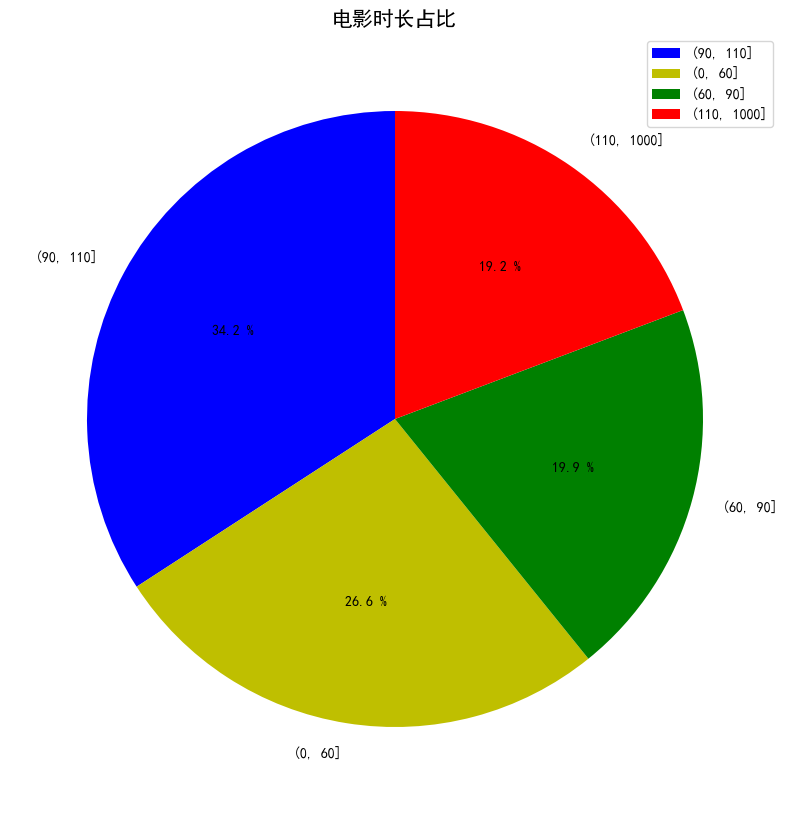

In [6]:
y=data.values
y=y/np.sum(y)
plt.figure(figsize=(10,10))

plt.title('电影时长占比',fontsize=15)
plt.pie(y,labels=data.index,autopct='%.1f %%',colors='bygr',startangle=90)
#图例增加
plt.legend()

(array([  23.,  126.,  255.,  383.,  419.,  510.,  740.,  970., 1505.,
        2316., 3357., 4619., 4897., 5412., 5151., 3781., 2430., 1213.,
         512.,  110.]),
 array([2.   , 2.395, 2.79 , 3.185, 3.58 , 3.975, 4.37 , 4.765, 5.16 ,
        5.555, 5.95 , 6.345, 6.74 , 7.135, 7.53 , 7.925, 8.32 , 8.715,
        9.11 , 9.505, 9.9  ]),
 <BarContainer object of 20 artists>)

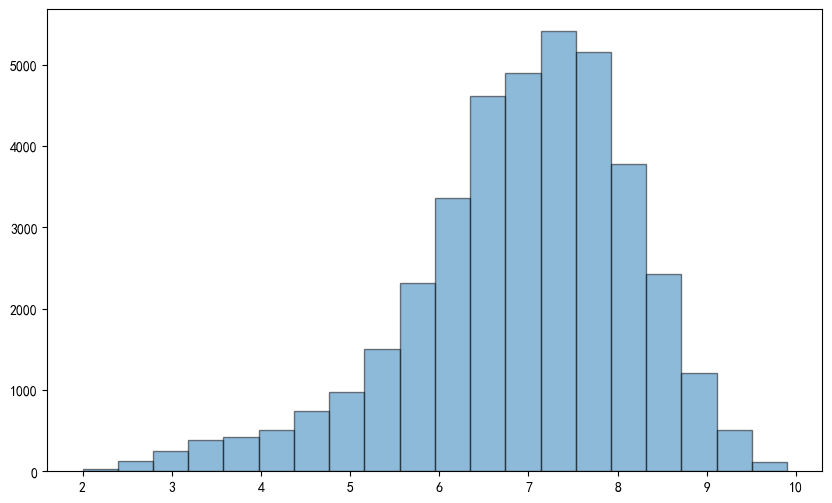

In [7]:
#根据评分绘制频率分布直方图
plt.figure(figsize=(10,6))
plt.hist(df['评分'],bins=20,edgecolor='k',alpha=0.5)#传入列，柱数，颜色，透明度

Text(0, 0.5, '概率分布')

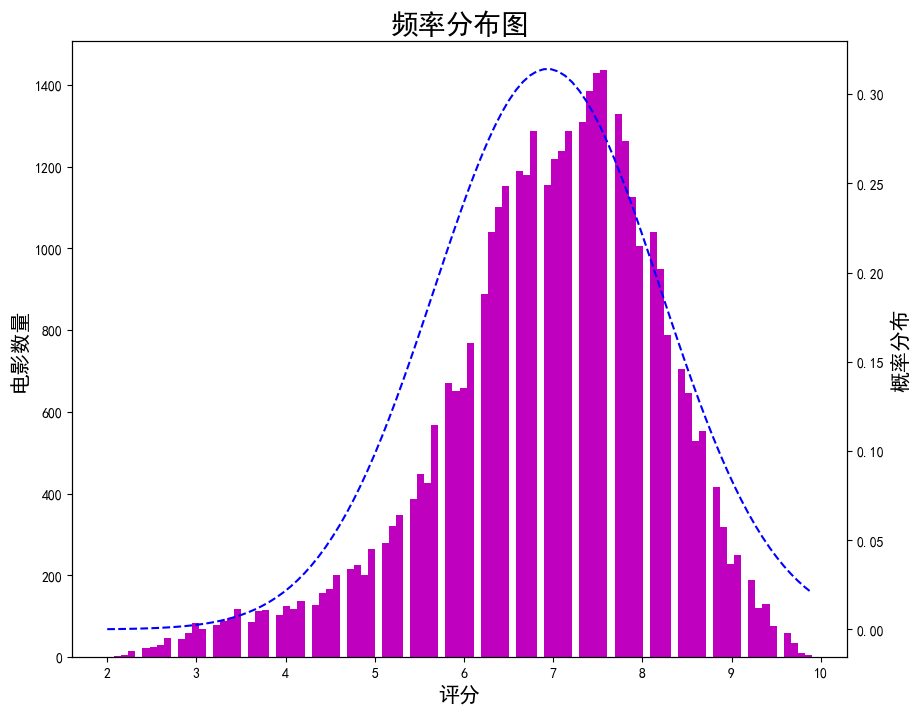

In [8]:
#双轴图画法
from scipy.stats import norm
fig=plt.figure(figsize=(10,8))
ax1=fig.add_subplot(1,1,1)
n,bins,patchs=plt.hist(df['评分'],bins=100,color='m')
ax1.set_ylabel('电影数量',fontsize=15)
ax1.set_xlabel('评分',fontsize=15)
ax1.set_title('频率分布图',fontsize=20)

y=norm.pdf(bins,df['评分'].mean(),df['评分'].std())
ax2=plt.twinx()#使用双轴
ax2.plot(bins,y,'b--')
ax2.set_ylabel('概率分布',fontsize=15)


Text(0, 0.5, '评分')

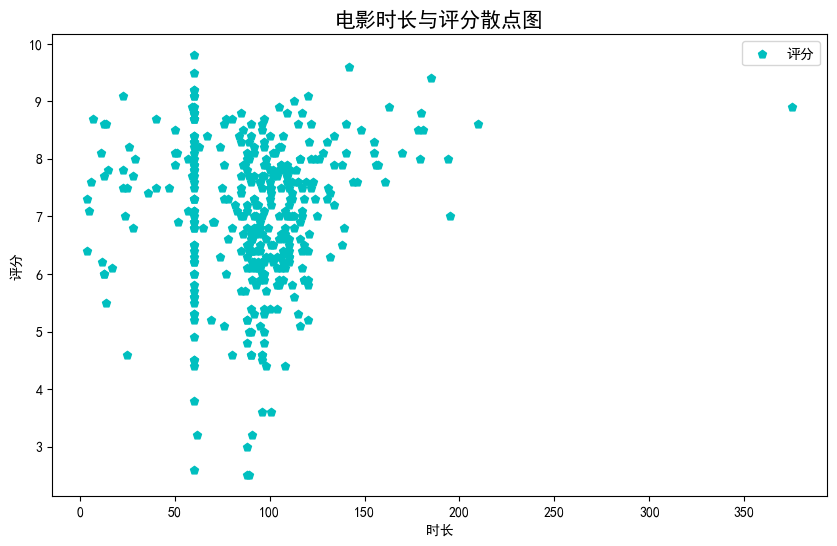

In [9]:
#根据电影时长与评分绘制散点图,判断具体分布
x=df['时长'][::100]
y=df['评分'][::100]

plt.figure(figsize=(10,6))
plt.scatter(x,y,color='c',marker='p',label='评分')#maker:设置点的形状
plt.legend()
plt.title('电影时长与评分散点图',fontsize=15)
plt.xlabel('时长',fontsize=10)
plt.ylabel('评分',fontsize=10)

Text(0, 0.5, '评分')

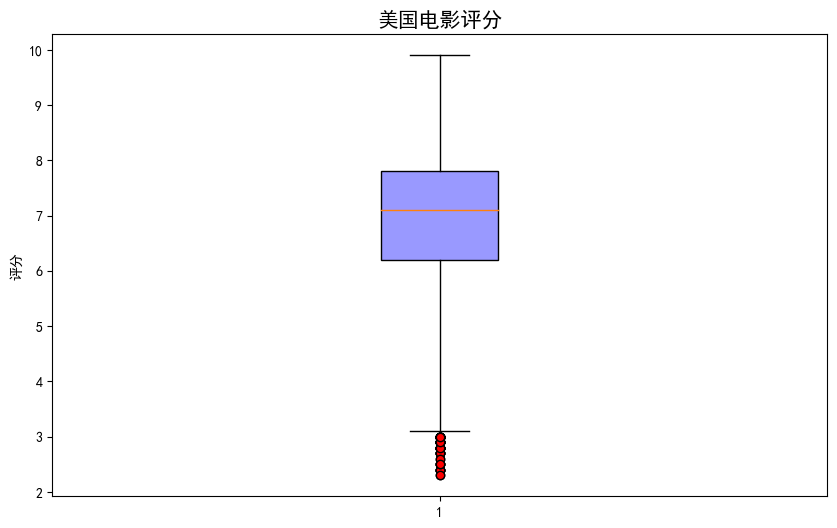

In [10]:
#绘制各个地区的箱型图,主要反映原始数据分布的特征
#可以快速观察到一组数据的上下限，上下四分位数，中位数以及极端异常值

#计算上下四分位数,中位数,用大于/小于上/下四分位数一点五倍差作为异常值划分的上下边缘线

data=df[df.产地=='美国']['评分']
plt.figure(figsize=(10,6))
plt.boxplot(data,whis=2,flierprops={'marker':'o','markerfacecolor':'r','color':'k'},
           patch_artist=True,boxprops={'color':'k','facecolor':'#9999ff'})#whis:异常值划分依据
plt.title('美国电影评分',fontsize=15)
plt.ylabel('评分')

Text(0.5, 1.0, '电影评分箱线图')

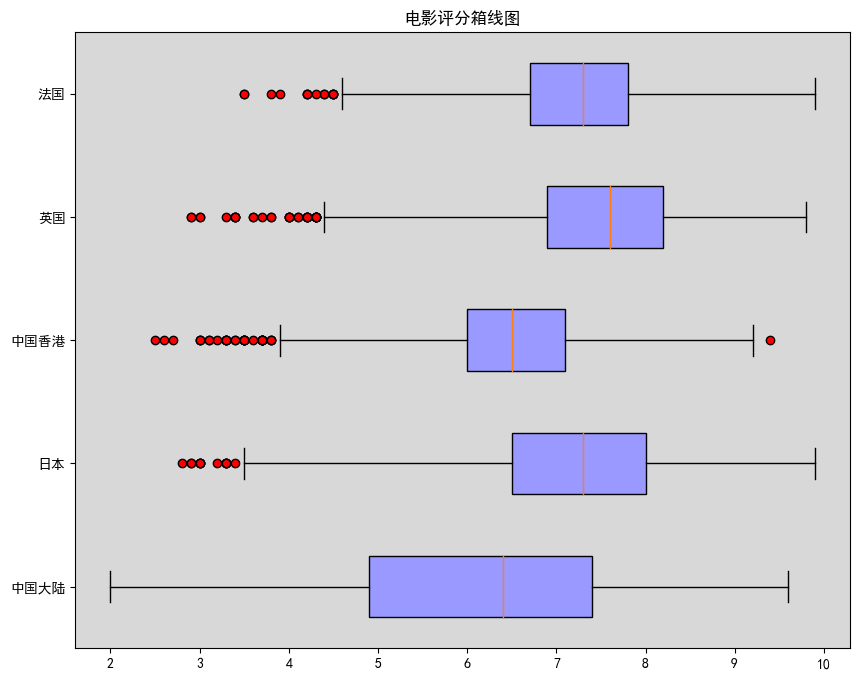

In [11]:
#多组数据箱图
data1=df[df.产地=='中国大陆']['评分']
data2=df[df.产地=='日本']['评分']
data3=df[df.产地=='中国香港']['评分']
data4=df[df.产地=='英国']['评分']
data5=df[df.产地=='法国']['评分']

plt.figure(figsize=(10,8))
plt.boxplot([data1,data2,data3,data4,data5],labels=['中国大陆','日本','中国香港','英国','法国'],whis=2,
           flierprops={'marker':'o','markerfacecolor':'r','color':'k'},
           patch_artist=True,boxprops={'color':'k','facecolor':'#9999ff'},vert=False)#用vert对图进行转置
ax=plt.gca()
ax.patch.set_facecolor('gray')#背景色为灰色
ax.patch.set_alpha(0.3)#透明度
plt.title('电影评分箱线图')

In [12]:
#相关系数矩阵图(热力图)

data=df[['投票人数','评分','时长']]
data[:5]

,投票人数,评分,时长
0,692795,9.6,142
1,42995,9.5,116
2,327855,9.5,116
3,580897,9.4,142
4,478523,9.4,171


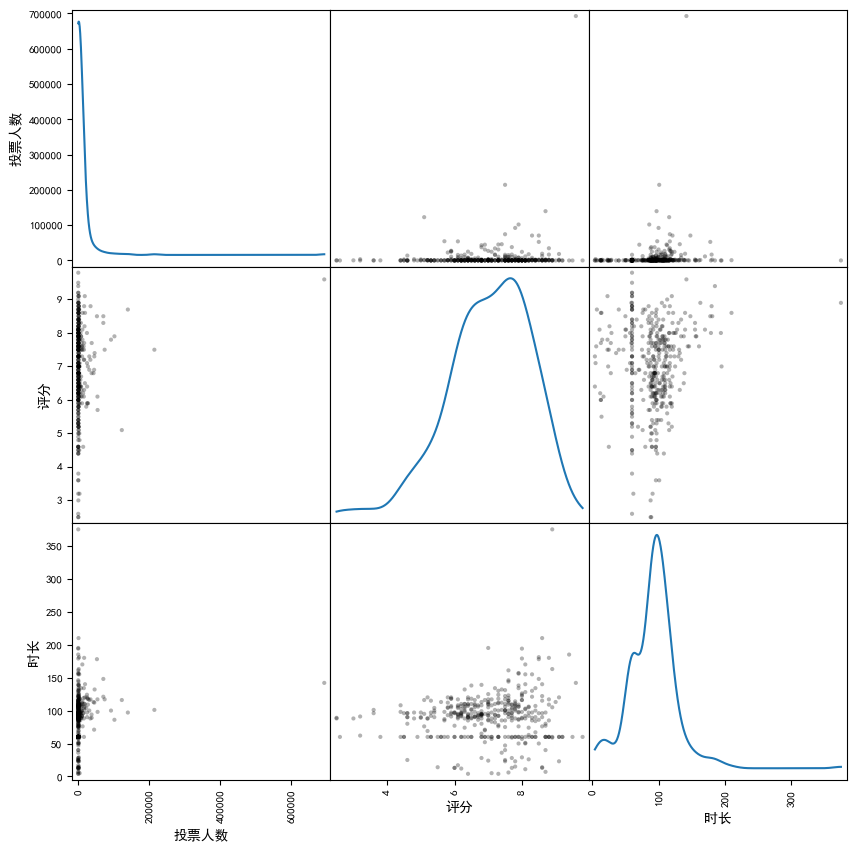

In [13]:
result=pd.plotting.scatter_matrix(data[::100],diagonal='kde',color='k',alpha=0.3,figsize=(10,10))#kde密度估计,hist直方图

          投票人数        评分        时长
投票人数  1.000000  0.122926  0.142891
评分    0.122926  1.000000  0.039955
时长    0.142891  0.039955  1.000000


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, '投票人数'), Text(0, 1.5, '评分'), Text(0, 2.5, '时长')])

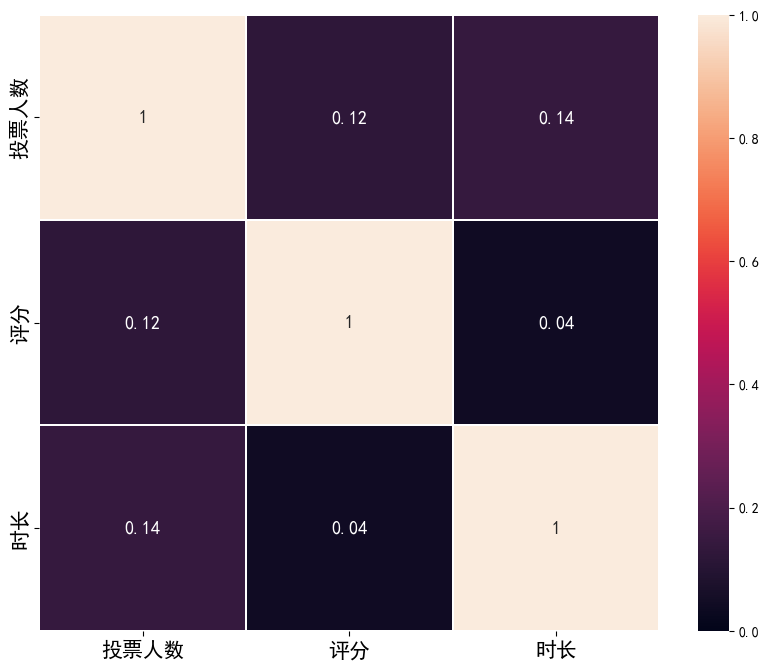

In [16]:
import seaborn as sns
import matplotlib.pylab as plt 
corr=data.corr()#计算相关系数矩阵
corr=abs(corr)

print(corr)
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

ax=sns.heatmap(corr,vmax=1,vmin=0,annot=True,annot_kws={'size':13,'weight':'bold'},linewidths=0.05)
#annot=True显示相关系数

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
D:\Anaconda3\python.exe
